# How-To Recipes

In [27]:
import staircase as sc
import operator
import warnings

from imports import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import hotstepper as hs
#from hotstepper import Steps, Step
from hotstepper.utilities import get_epoch_start,get_datetime,prepare_datetime
from hotstepper import Bases, Basis

import hotstepper.samples as samples

warnings.filterwarnings("ignore")


HotStepper has a number of sample datasets included to get you going and up to speed on some of the possibilities.
 - Veseel queue
 - Hotel Stays
 - Page views
 - Daily temperatures

All located under the submodule:
    import hotstepper.samples as samples

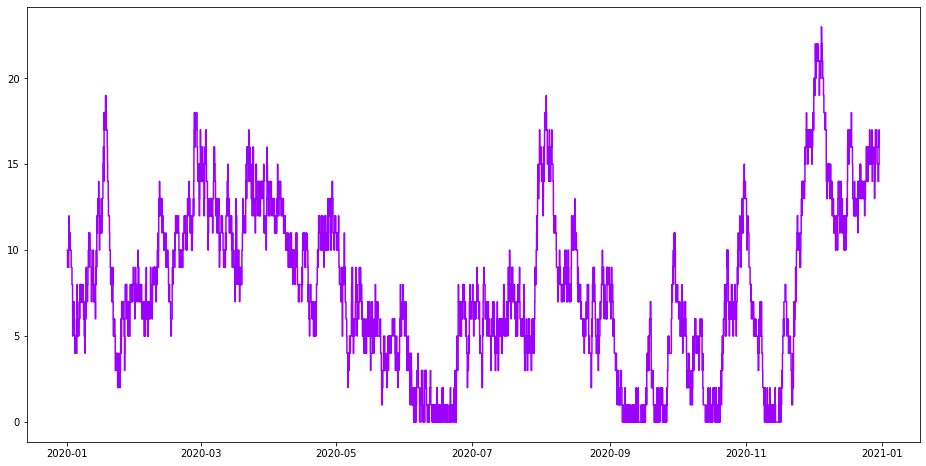

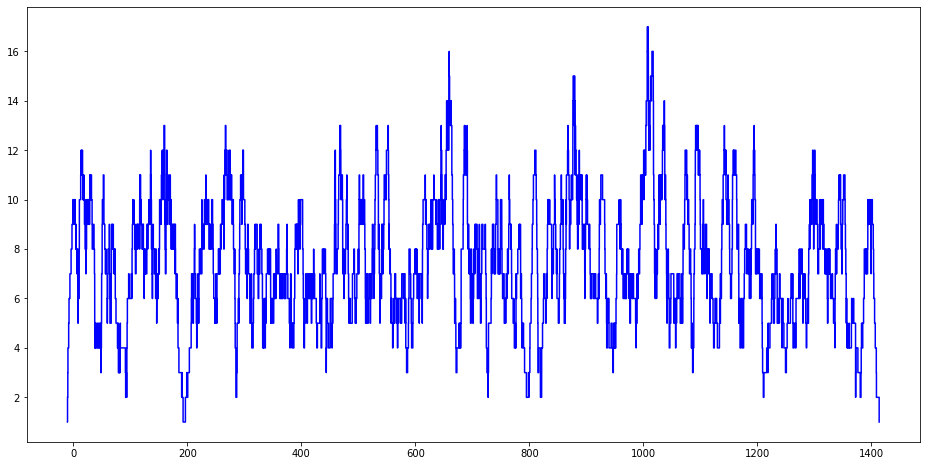

In [2]:
vessel_queue = samples.vessel_queue_sample()
ax = vessel_queue.plot()

page_views = samples.page_view_sample()
ax = page_views.plot(color='blue')

Quick facts about the dataset are only a method call away, for example, we can asked a bunch of questions about descriptive statistics.

In [3]:
print('\n',vessel_queue.min(),'\n',vessel_queue.max(),'\n',\
    vessel_queue.mean(),'\n',vessel_queue.mode(),'\n',vessel_queue.median(),'\n',
    vessel_queue.var(),'\n',vessel_queue.std(),'\n'
        )


 0.0 
 23.0 
 7.721851302262406 
 6.0 
 7.0 
 23.431962388696512 
 4.840657226936908 



We can also get other facts that might seem obvious, but instead of going anywhere else, we can just use our steps object.

In [35]:
print('\n',vessel_queue.first(),'\n',vessel_queue.last(),'\n',\
    vessel_queue.integrate(),'\n',vessel_queue.percentile(25),
        )


 2020-01-01 04:40:00 
 2020-12-30 18:11:00 
 67562.46666666663 
 5.0


now we have seen we can get the individual stats, we could just get them all at once.

In [33]:
vessel_queue.describe()

,Metric,Value
0,Count,2422
1,Mean,7.72
2,Median,7.0
3,Mode,6.0
4,Std,4.84
5,Var,23.43
6,Min,0.0
7,25%,5.0
8,75%,12.0
9,Max,23.0


We also can directly get the raw first, last, span and weightings of each step within the steps object.

NOTE: All values are raw in the sense that they are all float values as stored internally. For example, if we use a helper function to convert the first and last values from this method into a format they are supposed to be.

The weights seem abstract, but they represent how much of the total span (think duration from the start to the end of the steps) the steps stay at that value before changing to the next value. For example, if you filter for the maximum value in the weights array, this represents the maximum time that was spent at a single step value. 



In [39]:
s,e,span,weights = vessel_queue.span_and_weights()

print('\nfirst timestamp',get_datetime(s),'\nlast timestamp',get_datetime(e),'\nTotal duration',int(span/(24*3600)),'days','\nstep value duration percentages',weights,'\n',)
print('percentage of total time of longest duration single step value',np.amax(weights),'\n')
print('longest single value duration is',np.amax(weights)*span/3600,'hours\n')

start_longest_dt = get_datetime(vessel_queue.iloc(1+np.argmax(weights))[0])
end_longest_dt = get_datetime(vessel_queue.iloc(2+np.argmax(weights))[0])

print('Longest single value is between',start_longest_dt,' - ',end_longest_dt,'\nand a value of',vessel_queue(start_longest_dt)[0],'\n')


first timestamp 2020-01-01 04:40:00 
last timestamp 2020-12-30 18:11:00 
Total duration 364 days 
step value duration percentages [5.61935802e-04 2.51442461e-04 6.51464557e-04 ... 1.14292028e-04
 2.28584055e-05 0.00000000e+00] 

percentage of total time of longest duration single step value 0.004122132460650207 

longest single value duration is 36.06666666666666 hours

Longest single value is between 2020-11-14 04:25:00  -  2020-11-15 16:29:00 
and a value of 0.0 



We can even have a look at what this looks like by clipping a section out of the data set

<AxesSubplot:>

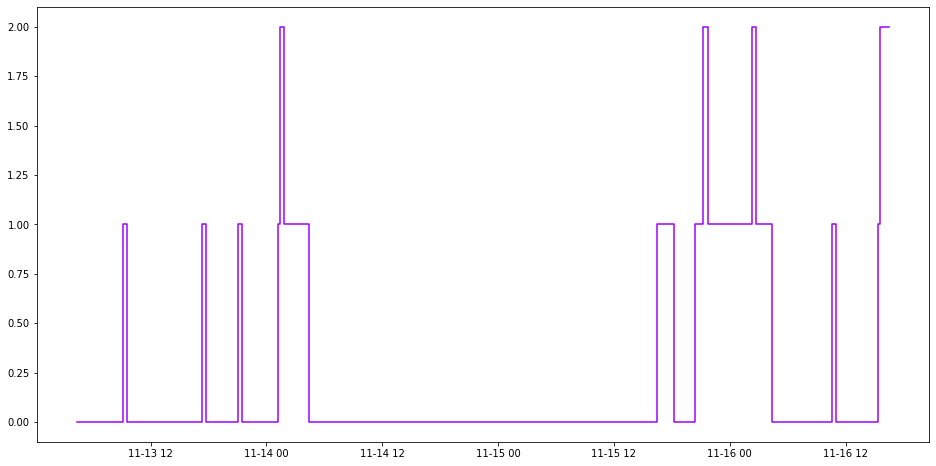

In [40]:
vessel_queue_clip = vessel_queue.clip(lbound=start_longest_dt-pd.Timedelta(days=1),ubound=end_longest_dt+pd.Timedelta(days=1))
vessel_queue_clip.plot()

In [ ]:
clip_step_end = hs.Step(end=pd.Timestamp(2020,1,10))
steps_end = hs.Steps(True).add_direct([None],[pd.Timestamp(2020,1,10)])
clip_step_start = hs.Step(start=pd.Timestamp(2020,5,1))

ax = vsteps.clip(ubound=pd.Timestamp(2020,1,10)).plot(color='g')
(vsteps*clip_step_end).plot(ax=ax,color='black')
(vsteps*steps_end).plot(ax=ax,color='r')
